In [1]:
# import the necessary libraries

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

Preprocessing

In [2]:
house_data = pd.read_csv("dataset/kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
incident_data = pd.read_csv("dataset/KCSO_Incident_Dataset__Historic_to_2019.csv")
incident_data.head()

,case_number,incident_datetime,incident_type,FCR,address_1,city,state,zip,created_at,updated_at,hour_of_day,day_of_week,Incident Block Location
0,C19046940,12/09/2019 09:02:00 AM,Other,503,1 Block AVE & YESLER WAY,SEATTLE,WA,98104,12/12/2019 06:19:00 PM,12/12/2019 08:07:00 PM,9,Monday,NaN
1,C19046039,12/02/2019 06:01:00 PM,Other,162,19700 Block 635TH PL NE,BARING,WA,98224,12/05/2019 05:15:00 PM,12/05/2019 07:06:00 PM,18,Monday,NaN
2,C19026684,07/14/2019 01:29:00 AM,Vehicle Recovery,311,1 Block PL S & DES MOINES MEMORIAL DR S,BURIEN,WA,98168,07/15/2019 05:45:00 AM,07/15/2019 06:09:00 PM,1,Sunday,NaN
3,C19043968,11/16/2019 10:07:00 PM,Traffic,404,RAINIER AVE N & RENTON AVE S,SKYWAY,WA,98178,11/19/2019 04:30:00 PM,11/19/2019 06:16:00 PM,22,Saturday,NaN
4,C19042199,11/04/2019 07:18:00 AM,Property Crime,313,1 Block PL S & DES MOINES MEMORIAL DR S,BURIEN,WA,98168,11/05/2019 04:35:00 PM,11/05/2019 06:26:00 PM,7,Monday,NaN


In [5]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20449 entries, 0 to 20448
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   case_number              20449 non-null  object
 1   incident_datetime        20449 non-null  object
 2   incident_type            20449 non-null  object
 3   FCR                      20449 non-null  int64 
 4   address_1                20449 non-null  object
 5   city                     20449 non-null  object
 6   state                    20449 non-null  object
 7   zip                      20133 non-null  object
 8   created_at               20449 non-null  object
 9   updated_at               20449 non-null  object
 10  hour_of_day              20449 non-null  int64 
 11  day_of_week              20449 non-null  object
 12  Incident Block Location  17713 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.0+ MB


In [6]:
clean_date = house_data.date.apply(lambda x: x.split('T')[0])
clean_date

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

In [7]:
# replace date column with the clean_date

house_data["date"] = clean_date
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# convert price to integers as pennies are irrelevant when dealing with high prices

house_data.price = house_data.price.astype(np.int64)

In [9]:
# check to see if price has been converted to integer

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
# select columns to plot to check for outliers using scatterplots

cols_to_plot = house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

Graph for Price: Total = 4028


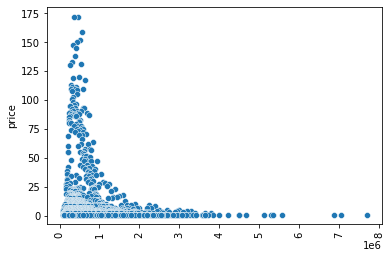

Graph for Bedrooms: Total = 13


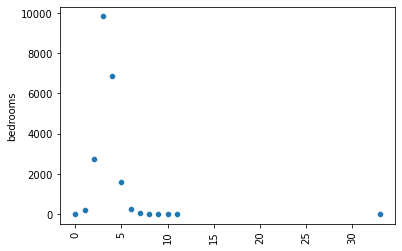

Graph for Bathrooms: Total = 30


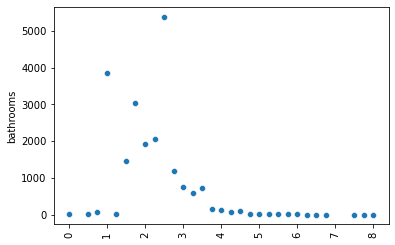

Graph for Sqft_living: Total = 1038


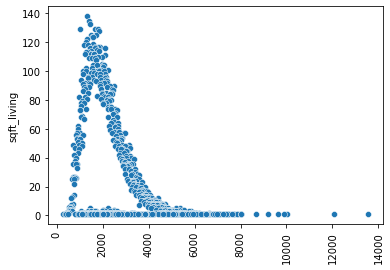

Graph for Sqft_lot: Total = 9782


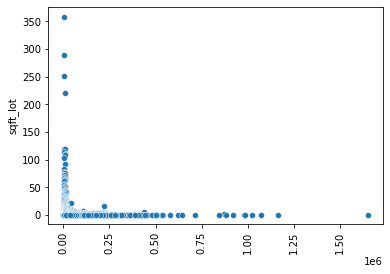

Graph for Floors: Total = 6


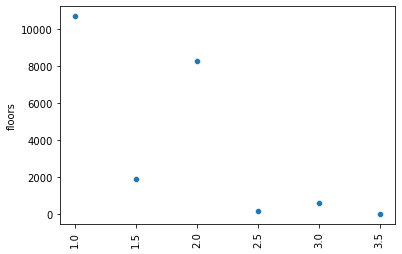

Graph for Waterfront: Total = 2


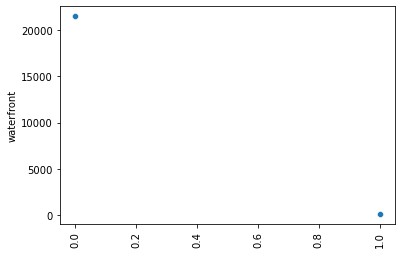

Graph for View: Total = 5


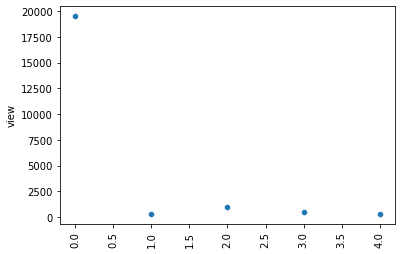

Graph for Condition: Total = 5


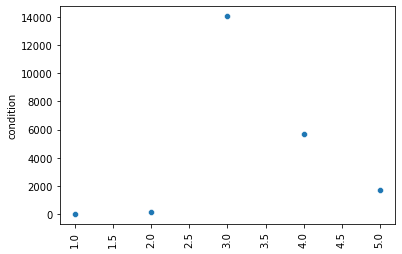

Graph for Grade: Total = 12


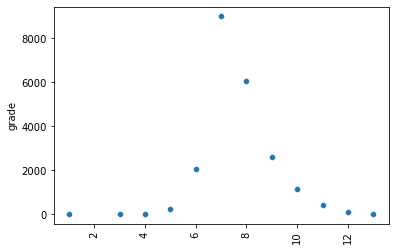

Graph for Sqft_above: Total = 946


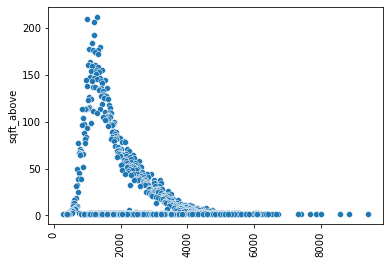

Graph for Sqft_basement: Total = 306


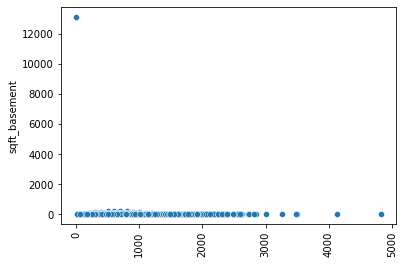

Graph for Yr_built: Total = 116


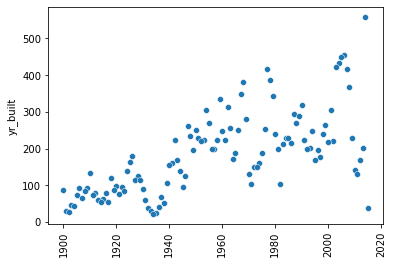

Graph for Yr_renovated: Total = 70


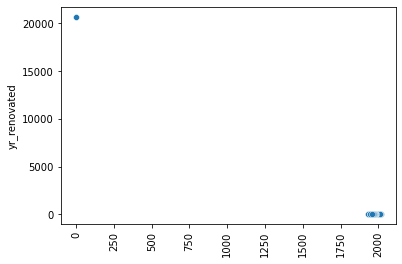

Graph for Zipcode: Total = 70


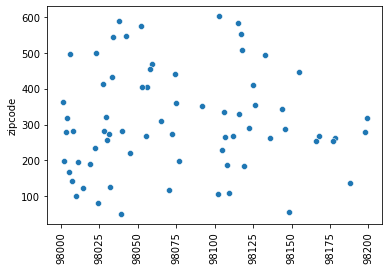

Graph for Lat: Total = 5034


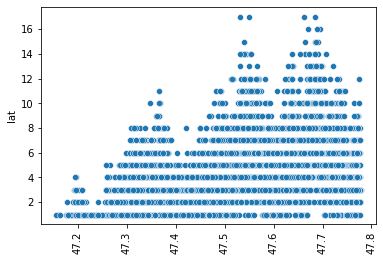

Graph for Long: Total = 752


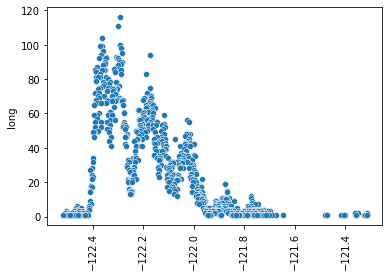

Graph for Sqft_living15: Total = 777


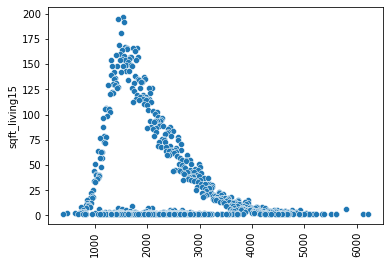

Graph for Sqft_lot15: Total = 8689


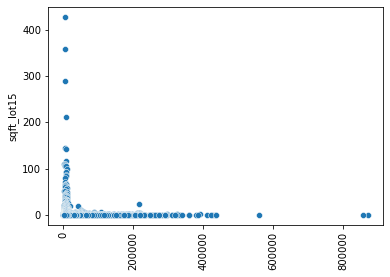

In [11]:
# Function to plot scatterplots

def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print('Graph for {}: Total = {}'.format(i.capitalize(), len(cat_num)))
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
plot_scatterplots()

In [12]:
# remove outliers for price (over 4mil)

house_data = house_data[house_data.price < 4000000]

In [13]:
# remove outliers for bedrooms (0, 10, 11, 33) a house with 0 makes no sense and anything >= 10 is rare

house_data = house_data[house_data.bedrooms < 10]
house_data = house_data[house_data.bedrooms > 0]

In [14]:
# remove outliers for bathrooms (0) makes no sense if a house has none

house_data = house_data[house_data.bathrooms  > 0]

In [15]:
# convert those with yr_renovated == 0 to yr_built

house_data["yr_renovated"] = [house_data.iloc[i]["yr_renovated"].item() if house_data.iloc[i]["yr_renovated"].item() > 0 else house_data.iloc[i]["yr_built"].item() for i in range(len(house_data))]
# house_data.drop(["yr_renovated"], axis=1, inplace=True)
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

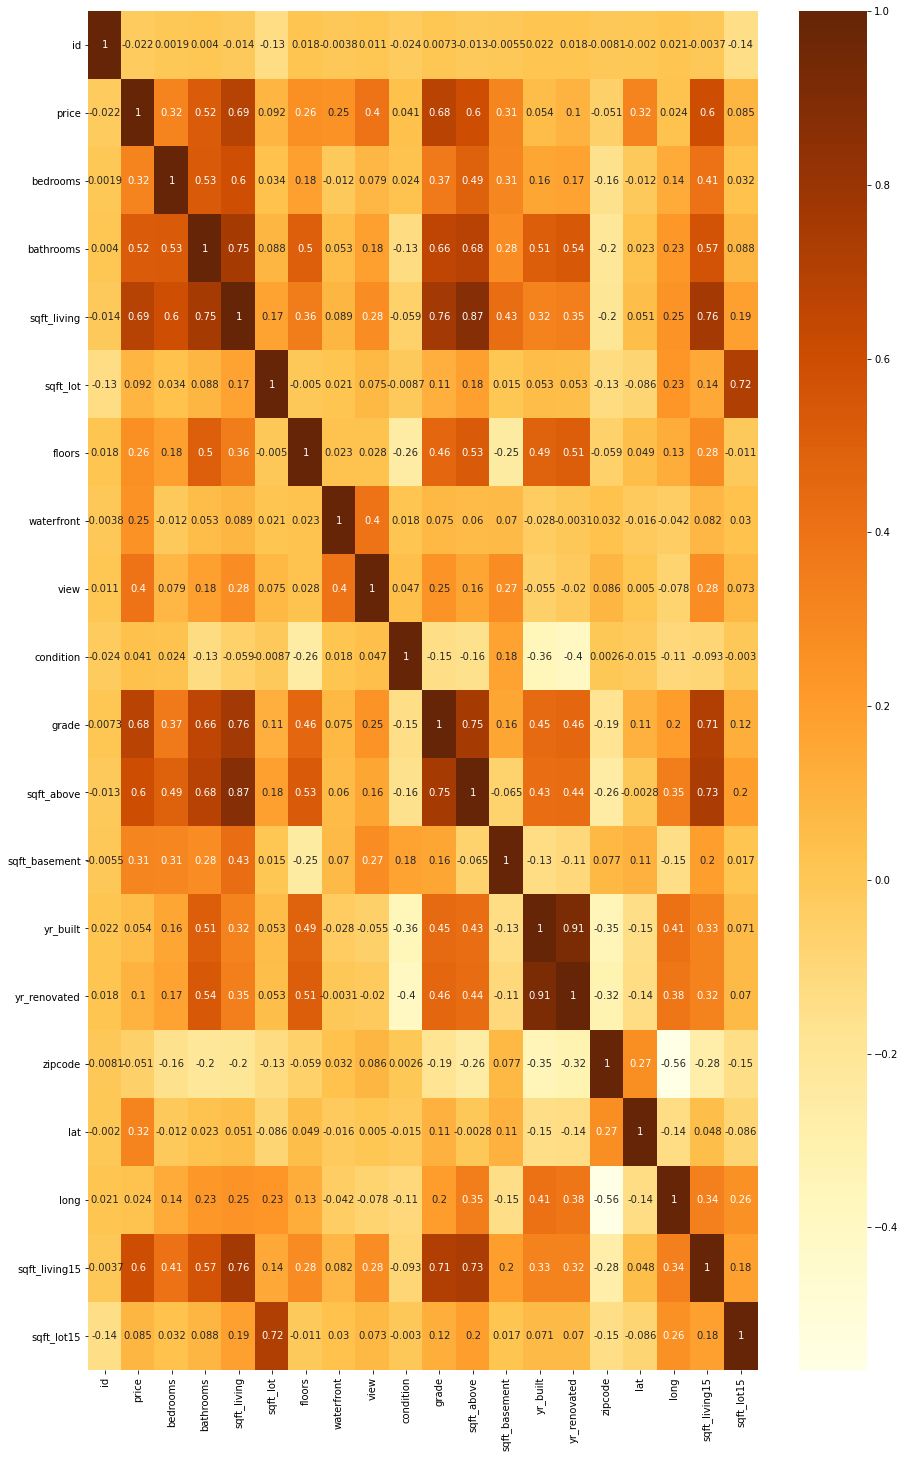

In [16]:
plt.figure(figsize=(15,25))
sns.heatmap(house_data.corr(), cmap='YlOrBr', annot=True)

In [17]:
house_data.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.694169
grade            0.677954
sqft_above       0.598528
sqft_living15    0.597643
bathrooms        0.520704
view             0.397441
lat              0.320167
bedrooms         0.319325
sqft_basement    0.312332
floors           0.264197
waterfront       0.248995
yr_renovated     0.104396
sqft_lot         0.092248
sqft_lot15       0.084846
yr_built         0.054020
condition        0.040500
long             0.024469
id              -0.022166
zipcode         -0.051256
Name: price, dtype: float64

In [18]:
# filter and create a new df for crime incidences that occurred since 2000

filtered_incidences = []
for i in range(len(incident_data["incident_datetime"])):
    curr_datetime = incident_data["incident_datetime"][i]
    datetime_split = curr_datetime.split()
    curr_date = datetime.datetime.strptime(datetime_split[0], "%m/%d/%Y")
    if curr_date.year >= 2000 and curr_date.year <= 2015:
        curr_row = incident_data.iloc[i]
        temp = [curr_date.year, curr_row["zip"]]
        filtered_incidences.append(temp)
filtered_incidences_df = pd.DataFrame(filtered_incidences, columns=["year", "zip"])

In [19]:
def add_to_dict(dict_add, key):
    if key not in dict_add:
        dict_add[key] = 1
    else:
        dict_add[key] += 1

In [20]:
# create ref dict for cumulative crime numbers per year and zipcode

filtered_dict = {2014:{}, 2015:{}}
for i in range(len(filtered_incidences_df)):
    year, zip_code = filtered_incidences_df.iloc[i]["year"], filtered_incidences_df.iloc[i]["zip"]
    if not math.isnan(float(zip_code)):
        if year == 2015:
            add_to_dict(filtered_dict[2015], zip_code)
        else:
            add_to_dict(filtered_dict[2014], zip_code)
            add_to_dict(filtered_dict[2015], zip_code)
filtered_dict

{2014: {'89103': 1,
  '98077': 2,
  '98058': 5,
  '98038': 2,
  '98024': 3,
  '98118': 1,
  '98144': 1,
  '98045': 1,
  '98101': 1,
  '98146': 2,
  '98065': 1,
  '98001': 5,
  '98051': 1,
  '98019': 1,
  '98168': 1,
  '98059': 1,
  '98014': 1,
  '98105': 1,
  '98106': 1,
  '98022': 1,
  '98037': 1,
  '98074': 1,
  '98070': 2,
  '98104': 1,
  '98056': 1,
  '98023': 1},
 2015: {'89103': 1,
  '98077': 2,
  '98058': 6,
  '98038': 2,
  '98024': 3,
  '98042': 1,
  '98118': 1,
  '98144': 1,
  '98045': 1,
  '98101': 1,
  '98146': 2,
  '98065': 1,
  '98001': 5,
  '98051': 1,
  '98178': 2,
  '98019': 1,
  '98168': 1,
  '98072': 1,
  '98059': 2,
  '98105': 2,
  '98014': 1,
  '98106': 1,
  '98022': 1,
  '98037': 1,
  '98074': 1,
  '98070': 2,
  '98104': 1,
  '98053': 1,
  '98056': 1,
  '98023': 1}}

In [21]:
# create copy of house data for crime numbers to be included later

house_data_with_crime = house_data.copy()
house_data_with_crime.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [22]:
# create column for no. of crimes for house data with crime numbers

crime_numbers = []
for i in range(len(house_data_with_crime)):
    date, zip_code = house_data_with_crime.iloc[i]["date"], str(house_data_with_crime.iloc[i]["zipcode"])
    curr_year = datetime.datetime.strptime(date, "%Y%m%d").year
    if zip_code not in filtered_dict[curr_year]:
        crime_numbers.append(0)
    else:
        crime_numbers.append(filtered_dict[curr_year][zip_code])
house_data_with_crime["no_of_crimes"] = crime_numbers

# can use below line to check if crime number corresponds to 98058 using ref dict (that was created earlier)
# house_data_with_crime[house_data_with_crime["zipcode"] == 98058]

In [23]:
# drop id and date for both dataframes as they do not provide much value
# (can consider implementing) however, first create columns for year, month & day before dropping date column

# house_data["date"] = pd.to_datetime(house_data["date"])
# house_data["year"] = house_data["date"].dt.year
# house_data["month"] = house_data["date"].dt.month
# house_data["day"] = house_data["date"].dt.day
# house_data_with_crime["date"] = pd.to_datetime(house_data_with_crime["date"])
# house_data_with_crime["year"] = house_data_with_crime["date"].dt.year
# house_data_with_crime["month"] = house_data_with_crime["date"].dt.month
# house_data_with_crime["day"] = house_data_with_crime["date"].dt.day
house_data.drop(["id", "date", "zipcode"], axis=1, inplace=True)
house_data_with_crime.drop(["id", "date", "zipcode"], axis=1, inplace=True)

In [24]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,47.6168,-122.045,1800,7503


In [25]:
house_data_with_crime.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,no_of_crimes
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,47.5112,-122.257,1340,5650,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,0
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,47.7379,-122.233,2720,8062,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,47.5208,-122.393,1360,5000,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,47.6168,-122.045,1800,7503,1


In [26]:
house_data_with_crime.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.694169
grade            0.677954
sqft_above       0.598528
sqft_living15    0.597643
bathrooms        0.520704
view             0.397441
lat              0.320167
bedrooms         0.319325
sqft_basement    0.312332
floors           0.264197
waterfront       0.248995
yr_renovated     0.104396
sqft_lot         0.092248
sqft_lot15       0.084846
yr_built         0.054020
condition        0.040500
long             0.024469
no_of_crimes    -0.185489
Name: price, dtype: float64

# Train Test Split

In [63]:
# K Fold Stratified with 5 folds

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**Scaling features for both datasets before train_test_split**

**For house data w/o crime numbers**

In [28]:
scaler = MinMaxScaler()

In [29]:
X = scaler.fit_transform(house_data.iloc[:,1:].values)
y = house_data.iloc[:,0].values

# can tune parameters accordingly for experimentation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

**For house data with crime numbers**

In [30]:
X_2 = scaler.fit_transform(house_data_with_crime.iloc[:,1:].values)
y_2 = house_data_with_crime.iloc[:,0].values

# can tune parameters accordingly for experimentation
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=2021)

# Random Forest Regression

**Without Crime Rate**

In [31]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (17264, 17)
Training Labels Shape: (17264,)
Testing Features Shape: (4316, 17)
Testing Labels Shape: (4316,)


In [70]:
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Train the model on training data
rf.fit(X_train, y_train);

In [71]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
                         
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"MSE: {mean_squared_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X, y, cv=strat_k_fold)), 4)}")                
print('Accuracy:', round(accuracy, 2), '%.')

Evaluation Metrics for Random Forest Regression
MAE: 74658.76880106793
MSE: 17039812590.488087
RMSE: 130536.63313602081
R-squared score for train: 0.9338765936894755
R-squared score for test: 0.8525644405894056


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8554
Accuracy: 85.35 %.


**With Crime Rate**

In [34]:
print('Training Features Shape:', X_train_2.shape)
print('Training Labels Shape:', y_train_2.shape)
print('Testing Features Shape:', X_test_2.shape)
print('Testing Labels Shape:', y_test_2.shape)

Training Features Shape: (17264, 18)
Training Labels Shape: (17264,)
Testing Features Shape: (4316, 18)
Testing Labels Shape: (4316,)


In [72]:
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf_2 = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Train the model on training data
rf_2.fit(X_train_2, y_train_2);

In [73]:
# Use the forest's predict method on the test data
predictions_2 = rf_2.predict(X_test_2)

# Calculate the absolute errors
errors_2 = abs(predictions_2 - y_test_2)

# Calculate mean absolute percentage error (MAPE)
mape_2 = 100 * (errors_2 / y_test_2)
                         
# Calculate and display accuracy
accuracy_2 = 100 - np.mean(mape_2)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test_2, predictions_2)}")
print(f"MSE: {mean_squared_error(y_test_2, predictions_2)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, predictions_2))}")
print(f"R-squared score for train: {rf_2.score(X_train_2, y_train_2)}")
print(f"R-squared score for test: {rf_2.score(X_test_2, y_test_2)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf_2, X_2, y_2, cv=strat_k_fold)), 4)}")                
print('Accuracy:', round(accuracy_2, 2), '%.')

Evaluation Metrics for Random Forest Regression
MAE: 74250.42506954508
MSE: 16975505292.484745
RMSE: 130290.08132810703
R-squared score for train: 0.932915968733435
R-squared score for test: 0.853120854130045


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8548
Accuracy: 85.44 %.


In [74]:
print(house_data.iloc[:,1:].columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [75]:
feature_list = list(house_data.iloc[:,1:].columns)


In [76]:
feature_list_w_crime = list(house_data_with_crime.iloc[:,1:].columns)

### Feature Importance (without crime)

In [77]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sqft_living          Importance: 0.17
Variable: grade                Importance: 0.16
Variable: lat                  Importance: 0.14
Variable: sqft_above           Importance: 0.1
Variable: sqft_living15        Importance: 0.1
Variable: bathrooms            Importance: 0.06
Variable: long                 Importance: 0.05
Variable: view                 Importance: 0.04
Variable: sqft_basement        Importance: 0.03
Variable: yr_built             Importance: 0.03
Variable: sqft_lot             Importance: 0.02
Variable: waterfront           Importance: 0.02
Variable: yr_renovated         Importance: 0.02
Variable: sqft_lot15           Importance: 0.02
Variable: bedrooms             Importance: 0.01
Variable: floors               Importance: 0.01
Variable: condition            Importance: 0.01


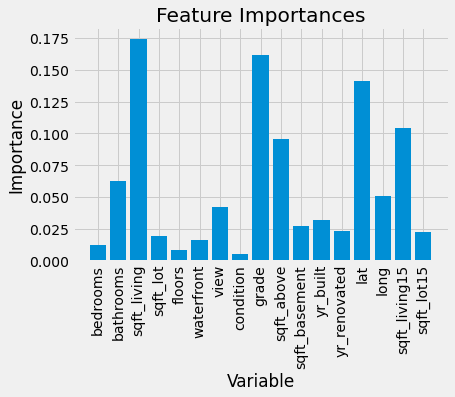

In [78]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Feature Importances');

In [79]:
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf_most_important = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Extract the ten most important features
important_indices = [feature_list.index('sqft_living'), feature_list.index('grade'), feature_list.index('lat'), feature_list.index('sqft_living15'), feature_list.index('sqft_above'), feature_list.index('bathrooms'), feature_list.index('long'), feature_list.index('view'), feature_list.index('sqft_basement'), feature_list.index('yr_built')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, y_train)

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [80]:
# Use the forest's predict method on the test data
predictions = rf_most_important.predict(test_important)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
                         
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"MSE: {mean_squared_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")
print(f"R-squared score for train: {rf_most_important.score(train_important, y_train)}")
print(f"R-squared score for test: {rf_most_important.score(test_important, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf_most_important, X, y, cv=strat_k_fold)), 4)}")                
print('Accuracy:', round(accuracy, 2), '%.')

Evaluation Metrics for Random Forest Regression
MAE: 73669.58904768073
MSE: 17016961241.53546
RMSE: 130449.07528049196
R-squared score for train: 0.9362614610893697
R-squared score for test: 0.8527621599832209


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8554
Accuracy: 85.7 %.


### Feature Importance (with crime)

In [81]:
# Get numerical feature importances
importances_w_crime = list(rf_2.feature_importances_)

# List of tuples with variable and importance
feature_importances_w_crime = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_w_crime, importances_w_crime)]

# Sort the feature importances by most important first
feature_importances_w_crime = sorted(feature_importances_w_crime, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_w_crime];

Variable: sqft_living          Importance: 0.17
Variable: grade                Importance: 0.17
Variable: lat                  Importance: 0.14
Variable: sqft_living15        Importance: 0.1
Variable: sqft_above           Importance: 0.08
Variable: bathrooms            Importance: 0.07
Variable: long                 Importance: 0.05
Variable: view                 Importance: 0.04
Variable: sqft_basement        Importance: 0.03
Variable: yr_built             Importance: 0.03
Variable: sqft_lot             Importance: 0.02
Variable: waterfront           Importance: 0.02
Variable: yr_renovated         Importance: 0.02
Variable: sqft_lot15           Importance: 0.02
Variable: bedrooms             Importance: 0.01
Variable: floors               Importance: 0.01
Variable: condition            Importance: 0.01
Variable: no_of_crimes         Importance: 0.01


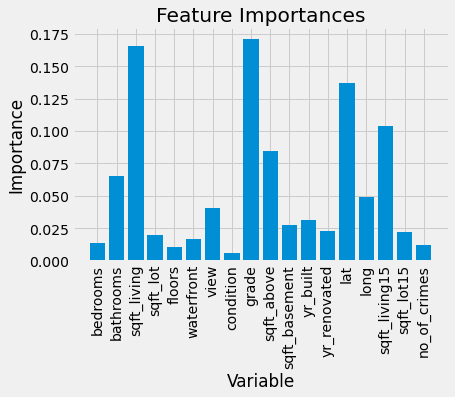

In [82]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances_w_crime)))
# Make a bar chart
plt.bar(x_values, importances_w_crime, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list_w_crime, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Feature Importances');

In [83]:
# New random forest with only the two most important variables
rf_2_most_important = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Extract the ten most important features
important_indices_2 = [feature_list.index('grade'), feature_list.index('sqft_living'), feature_list.index('lat'), feature_list.index('sqft_living15'), feature_list.index('sqft_above'), feature_list.index('bathrooms'), feature_list.index('long'), feature_list.index('view'), feature_list.index('sqft_basement'), feature_list.index('yr_built')]
train_important_2 = X_train_2[:, important_indices_2]
test_important_2 = X_test_2[:, important_indices_2]

# Train the random forest
rf_2_most_important.fit(train_important_2, y_train_2)

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [84]:
# Use the forest's predict method on the test data
predictions_2 = rf_2_most_important.predict(test_important_2)

# Calculate the absolute errors
errors_2 = abs(predictions_2 - y_test_2)

# Calculate mean absolute percentage error (MAPE)
mape_2 = 100 * (errors_2 / y_test_2)
                         
# Calculate and display accuracy
accuracy_2 = 100 - np.mean(mape_2)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test_2, predictions_2)}")
print(f"MSE: {mean_squared_error(y_test_2, predictions_2)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, predictions_2))}")
print(f"R-squared score for train: {rf_2_most_important.score(train_important_2, y_train_2)}")
print(f"R-squared score for test: {rf_2_most_important.score(test_important_2, y_test_2)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf_2_most_important, X_2, y_2, cv=strat_k_fold)), 4)}")                
print('Accuracy:', round(accuracy_2, 2), '%.')

Evaluation Metrics for Random Forest Regression
MAE: 73688.46932587706
MSE: 16999927988.49533
RMSE: 130383.77195224616
R-squared score for train: 0.936071597128343
R-squared score for test: 0.8529095387866683


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8551
Accuracy: 85.69 %.


type | Accuracy | CV-score | Accuracy (top 10 features) | CV-score (top 10 features)
:-:|:-:|:-:|:-:|:-:
w/o crime rate | 85.35 | 0.8554 | 85.7 | 0.8551 
with crime rate| 85.44 | 0.8548 | 85.69 | 0.8554 

The accuracy for the top 10 features to be similar for both w/o crime rate and the crime rate is because the top 10 features do not include no_of_crimes inside due to low feature importance (0.01), and both have the same top 10 feature importance.

### Grid Search with Cross Validation

Gridsearch to find hyperperimeter

KFold | Best Score
:-:|:-:
3 | 0.8446 
5| 0.8432 
10 | 0.8436 
15 | 0.8433 

Gridsearch for cross-validation

Cross-Validation | KFold | Cross-Validation Score
:-:|:-:|:-:
3 | 3 | 0.8446 
3 | 5 | 0.8432 
3 | 10 | 0.8436 
3 | 15 | 0.8433 
5 | 3 | 0.8479 
5 | 5 | 0.8485 
5 | 10 | 0.8487 
5 | 15 | 0.8590 

We have decided to go with cross-validation stratifiedkfold of 5 to standardize our project. And also will be using KFold of 5 to train the random forest model as it give a better score compared to the rest.<br><br>
Hence this will be the hyperparameters used to train for random forest model<br>
Best Parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}

#### Fold: 3

In [48]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [49]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
print('best score: ', grid_search.best_score_)
print('best parameters: ', grid_search.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
best score:  0.8444860371185209
best parameters:  {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


#### Fold: 5

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [53]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
print('best score: ', grid_search.best_score_)
print('best parameters: ', grid_search.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best score:  0.8485515185748687
best parameters:  {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


#### Fold: 10

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [55]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
print('best score: ', grid_search.best_score_)
print('best parameters: ', grid_search.best_params_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
best score:  0.8521903204692786
best parameters:  {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


#### Fold: 15

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 15, n_jobs = -1, verbose = 2)

In [57]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
print('best score: ', grid_search.best_score_)
print('best parameters: ', grid_search.best_params_)

Fitting 15 folds for each of 288 candidates, totalling 4320 fits
best score:  0.8540311755764186
best parameters:  {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


### Grid Search StratifiedKFold

#### KFold = 3

In [59]:
#with stratifiedkfold = 3 #using cvfold = 3 parameters
rf = RandomForestRegressor(n_estimators= 300, max_depth= 90, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74693.24096362446
MSE: 16972691592.933859
RMSE: 130279.28305349956
R-squared score for train: 0.9338291609318053
R-squared score for test: 0.853145199431092


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8446


In [60]:
#with stratifiedkfold = 3 #using cvfold = 5 parameters
rf = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74810.55066419109
MSE: 17120936699.132732
RMSE: 130846.99728741478
R-squared score for train: 0.9337868542648186
R-squared score for test: 0.8518625209951498


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8432


In [61]:
#with stratifiedkfold = 3 #using cvfold = 10 parameters
rf = RandomForestRegressor(n_estimators= 1000, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74683.69090648582
MSE: 17109416562.78791
RMSE: 130802.9684785017
R-squared score for train: 0.9338653700716281
R-squared score for test: 0.8519621980155082


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8436


In [62]:
#with stratifiedkfold = 3 #using cvfold = 15 parameters
rf = RandomForestRegressor(n_estimators= 1000, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74585.49365176292
MSE: 16956483535.740551
RMSE: 130217.06315126506
R-squared score for train: 0.9343800389381801
R-squared score for test: 0.8532854382961947


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8433


#### KFold = 5

In [66]:
rf = RandomForestRegressor(n_estimators= 300, max_depth= 90, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74656.32402887473
MSE: 16988395904.685335
RMSE: 130339.54083349126
R-squared score for train: 0.9333366834921576
R-squared score for test: 0.853009319181474


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8479


In [67]:
#with stratifiedkfold = 5 #using cvfold = 5 parameters
rf = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74638.3970502988
MSE: 17015248114.439081
RMSE: 130442.50884753437
R-squared score for train: 0.9340802146406089
R-squared score for test: 0.8527769826727578


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8485


In [68]:
#with stratifiedkfold = 5 #using cvfold = 10 parameters
rf = RandomForestRegressor(n_estimators= 1000, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74644.11470623383
MSE: 17070163733.171991
RMSE: 130652.83668245397
R-squared score for train: 0.9337563276985215
R-squared score for test: 0.8523018298548926


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8487


In [69]:
#with stratifiedkfold = 5 #using randomized best params testing
rf = RandomForestRegressor(n_estimators= 1000, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74509.83326769283
MSE: 16973026615.870026
RMSE: 130280.56883461181
R-squared score for train: 0.9341294486471482
R-squared score for test: 0.8531423006730365


C:\Users\ongch\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.849
